# Trabajo semanal 14. Entrega sugerida 28/10

**1) Ej. 11 TP Filtrado Clásico**

Diseñe un atenuador de banda ancha que permita atenuar 30 dB intercalado en un cable coaxial de 75 ohms.
+ a) Obtenga una red que satisfaga los requerimientos.
+ b) Verifique que el atenuador cumpla con la impedancia y atenuación prescrita. 

**2) Ej. 12 TP Filtrado Clásico (Ampliado)**

Diseñe un acoplador/atenuador de banda ancha que permita interconectar un cable coaxil de 75 Ω a otro de 50 Ω. Es decir, la red en su entrada deberá permitir la conexión una ZI1=75Ω y en su salida ZI2=50Ω de impedancia característica.

+ a) Obtenga una red que satisfaga los requerimientos y atenúe 5.72 dB en potencia.
+ b) Verifique que el atenuador cumpla con la impedancia y atenuación prescrita. 
+ c) ¿Podría dicha red acoplar sin atenuar? 
+ d) Si la atenuación requerida fuera de 80 dB, ¿cómo cambiaría la red calculada en a)? Proponga una solución en caso que no se pueda implementar.

**Algunas pistas:**

+ Construyan la matriz T (como pueden ver acá abajo). Luego ya deberían saber qué hacer.

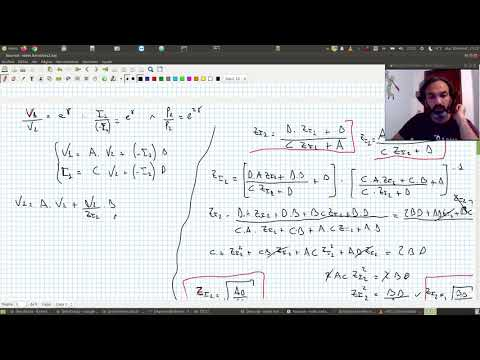

In [82]:
from IPython.display import YouTubeVideo
YouTubeVideo('MhpqwE2pvbM', width=800, height=300)

+ Si tienen que atenuar 80 dB, recuerden que pueden lograrlo de infinitas maneras, una podría ser 4 etapas de 20 dB cada una.

+ Guarda que coincidan las impedancias al interconectar!

**Bonus:**
+ +20 🎓 Simulación circuital de la red obtenida (ya lo deberían saber hacer)
+ +5 🍺 Presentación en jupyter notebook
***
## Resolucion:

### 1) Ej. 11 TP Filtrado Clásico

In [83]:
# Modulos y funciones
import numpy as np
import sympy as sp
import schemdraw as schem
import schemdraw.elements as e
from IPython.display import display, Latex


def TZ(Z):
    return np.matrix([[1,Z],[0,1]])

def TY(Y):
    return np.matrix([[1,0],[Y,1]])

def Timg(gamma, Zi1, Zi2):
    return np.matrix([[np.cosh(gamma)*np.sqrt(Zi1/Zi2),np.sinh(gamma)*np.sqrt(Zi1*Zi2)],[np.sinh(gamma)/np.sqrt(Zi1*Zi2),np.cosh(gamma)*np.sqrt(Zi2/Zi1)]])

def alpha_n(alpha_db):
    return alpha_db/8.69

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[15.8014158657904, 1182.73060390798],
[0.21026321847253, 15.8014158657904]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[(Z1/2 + Z2)/Z2, Z1**2/(4*Z2) + Z1],
[          1/Z2,    (Z1/2 + Z2)/Z2]])

<IPython.core.display.Latex object>

Eq(Matrix([
[(Z1/2 + Z2)/Z2, Z1**2/(4*Z2) + Z1],
[          1/Z2,    (Z1/2 + Z2)/Z2]]), Matrix([
[15.8014158657904, 1182.73060390798],
[0.21026321847253, 15.8014158657904]]))

Eq(Matrix([
[-15.8014158657904 + (Z1/2 + Z2)/Z2, Z1**2/(4*Z2) + Z1 - 1182.73060390798],
[          -0.21026321847253 + 1/Z2,   -15.8014158657904 + (Z1/2 + Z2)/Z2]]), Matrix([
[0, 0],
[0, 0]]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[15.8014158657904, 1182.73060390798],
[0.21026321847253, 15.8014158657904]])

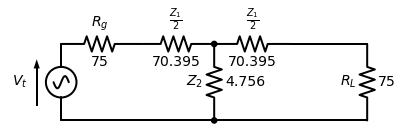

In [84]:
Z1, Z2= sp.symbols("Z1 Z2")

alpha_db = 30
Zi1 = Zi2 = Zo = 75

t_imagen = sp.Matrix(Timg(alpha_n(alpha_db), Zo, Zo))

display(Latex("Parametros T para "+ f"$\\alpha = {alpha_db}d_B$"))
display(Latex(f'$T_i=$'), sp.simplify(t_imagen))

t_z = sp.Matrix(np.dot(np.dot(TZ(Z1/2), TY(1/Z2)), TZ(Z1/2)))
t_z = sp.simplify(t_z)
display(Latex("Parametros T por impedancias:"))
display(Latex(f'$T_z=$'), t_z)

display(Latex("Igualando matrices:"))
display(sp.Eq(t_z, t_imagen))
display(sp.Eq(t_z - t_imagen, sp.Matrix([[0,0],[0,0]])))

Zs, = sp.nonlinsolve(t_z - t_imagen, Z1, Z2)
display(Latex("Resolviendo este sistema de ecuaciones:"))
display(Latex(f"$Z_1 = {Zs[0]}$"))
display(Latex(f"$Z_2 = {Zs[1]}$"))

t_z = (t_z.subs(Z1, Zs[0])).subs(Z2,Zs[1])
display(Latex("Reemplazando estos valores en $T_z:$"))
display(Latex(f'$T_z=$'), t_z)

# Construccion de esquematico

d = schem.Drawing(unit=2.5)
Zg = d.add(e.RES, d='right', label='$R_g$', botlabel='75') 
Z1_e = d.add(e.RES, d='right', label='$\\frac{Z_1}{2}$', botlabel=f'{round(float(Zs[0]/2),3)}')
d.add(e.DOT)
d.push()
Z2_e = d.add(e.RES, d='down', label='$Z_2$', botlabel=f'{round(float(Zs[1]),3)}')
d.pop()
Z1_e2 = d.add(e.RES, d='right', label='$\\frac{Z_1}{2}$', botlabel=f'{round(float(Zs[0]/2),3)}')
d.add(e.LINE, d='right', tox=Z2_e.end)
ZL = d.add(e.RES, d='down', label='$R_L$', botlabel='75')
d.add(e.LINE, d='left', tox=Z2_e.end)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=Zg.start)
Vt = d.add(e.SourceSin(), xy=Zg.start, toy=Z1_e2.end, lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.8, label='$V_t$')
d.draw()

## Simulacion Circuital:
<img src="1.png">
<img src="1_osc.png">

### 2) Ej. 12 TP Filtrado Clásico (Ampliado)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[  1.49978258799461,   43.282439027041],
[0.0115419837405443, 0.999855058663073]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[(Z1 + Z2)/Z2, Z1 + Z1*Z3/Z2 + Z3],
[        1/Z2,       (Z2 + Z3)/Z2]])

<IPython.core.display.Latex object>

Eq(Matrix([
[(Z1 + Z2)/Z2, Z1 + Z1*Z3/Z2 + Z3],
[        1/Z2,       (Z2 + Z3)/Z2]]), Matrix([
[  1.49978258799461,   43.282439027041],
[0.0115419837405443, 0.999855058663073]]))

Eq(Matrix([
[-1.49978258799461 + (Z1 + Z2)/Z2, Z1 + Z1*Z3/Z2 + Z3 - 43.282439027041],
[      -0.0115419837405443 + 1/Z2,    -0.999855058663073 + (Z2 + Z3)/Z2]]), Matrix([
[0, 0],
[0, 0]]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[  1.49978258799461,   43.282439027041],
[0.0115419837405443, 0.999855058663073]])

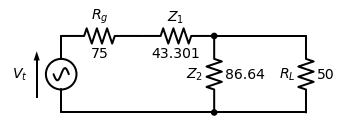

In [85]:
Z1, Z2, Z3 = sp.symbols("Z1 Z2 Z3")

alpha_db = 5.72
Zi1 = 75
Zi2 = 50
t_imagen = sp.Matrix(Timg(alpha_n(alpha_db), Zi1, Zi2))

display(Latex("Parametros T para "+ f"$\\alpha = {alpha_db}d_B$"))
display(Latex('$T_i=$'), sp.simplify(t_imagen))

t_z = sp.Matrix(np.dot(np.dot(TZ(Z1), TY(1/Z2)), TZ(Z3)))
t_z = sp.simplify(t_z)
display(Latex("Parametros T por impedancias:"))
display(Latex('$T_z=$'), t_z)

display(Latex("Igualando matrices:"))
display(sp.Eq(t_z, t_imagen))
display(sp.Eq(t_z - t_imagen, sp.Matrix([[0,0],[0,0]])))

Zsa, = sp.nonlinsolve(t_z - t_imagen, Z1, Z2, Z3)
display(Latex("Resolviendo este sistema de ecuaciones:"))
display(Latex(f"$Z_1 = {Zsa[0]}$"))
display(Latex(f"$Z_2 = {Zsa[1]}$"))
display(Latex(f"$Z_3 = {Zsa[2]}$"))
display(Latex("Como podemos ver $Z_3 \\to 0$"))

t_z = ((t_z.subs(Z1, Zsa[0])).subs(Z2,Zsa[1])).subs(Z3,Zsa[2])
display(Latex("Reemplazando estos valores en $T_z:$"))
display(Latex('$T_z=$'), t_z)

#%%
#Construccion de esquematico

d = schem.Drawing(unit=2.5)
Zg = d.add(e.RES, d='right', label='$R_g$', botlabel='75') 
Z1_e = d.add(e.RES, d='right', label='$Z_1$', botlabel=f'{round(float(Zsa[0]),3)}')
d.add(e.DOT)
d.push()
Z2_e = d.add(e.RES, d='down', label='$Z_2$', botlabel=f'{round(float(Zsa[1]),3)}')
d.pop()
d.add(e.LINE, d='right', l=3)
ZL = d.add(e.RES, d='down', label='$R_L$', botlabel='50')
d.add(e.LINE, d='left', tox=Z2_e.end)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=Zg.start)
Vt = d.add(e.SourceSin(), xy=Zg.start, toy=Z1_e.end, lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.8, label='$V_t$')
d.draw()

## Simulacion Circuital:
<img src="2-1.jpg">
<img src="2-1_osc.png">

In [86]:
# La medicion en LtSpice es afectada por el salto de impedancia por esto tenemos que tener encuenta el siguiente factor
medicion =-7.4686
salto = 10*np.log10(50/75)
print("Atenuacion real:", medicion - salto, "dB")

Atenuacion real: -5.707687409443188 dB


**d) Si la atenuación requerida fuera de 80 dB, ¿cómo cambiaría la red calculada en a)? Proponga una solución en caso que no se pueda implementar**

In [87]:
# Punto D
Z1, Z2, Z3 = sp.symbols("Z1 Z2 Z3")

alpha_db = 80
Zi1 = 75
Zi2 = 50
t_imagen = sp.Matrix(Timg(alpha_n(alpha_db), Zi1, Zi2))

display(Latex("Parametros T para "+ f"$\\alpha = {alpha_db}d_B$"))
display(Latex('$T_i=$'), sp.simplify(t_imagen))

t_z = sp.Matrix(np.dot(np.dot(TZ(Z1), TY(1/Z2)), TZ(Z3)))
t_z = sp.simplify(t_z)
display(Latex("Parametros T por impedancias:"))
display(Latex('$T_z=$'), t_z)

display(Latex("Igualando matrices:"))
display(sp.Eq(t_z, t_imagen))
display(sp.Eq(t_z - t_imagen, sp.Matrix([[0,0],[0,0]])))

Zs, = sp.nonlinsolve(t_z - t_imagen, Z1, Z2, Z3)
display(Latex("Resolviendo este sistema de ecuaciones:"))
display(Latex(f"$Z_1 = {Zs[0]}$"))
display(Latex(f"$Z_2 = {Zs[1]}$"))
display(Latex(f"$Z_3 = {Zs[2]}$"))
display(Latex(f"$Z_3 = {Zs[2]}$"))
display(Latex("Como podemos ver $Z_2 \\to 0$ no es un valor facil de conseguir, no es viable"))

t_z = ((t_z.subs(Z1, Zs[0])).subs(Z2,Zs[1])).subs(Z3,Zs[2])
display(Latex("Reemplazando estos valores en $T_z:$"))
display(Latex('$T_z=$'), t_z)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[6097.10454738709, 304855.221218894],
[81.2947256583717, 4064.73636492472]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[(Z1 + Z2)/Z2, Z1 + Z1*Z3/Z2 + Z3],
[        1/Z2,       (Z2 + Z3)/Z2]])

<IPython.core.display.Latex object>

Eq(Matrix([
[(Z1 + Z2)/Z2, Z1 + Z1*Z3/Z2 + Z3],
[        1/Z2,       (Z2 + Z3)/Z2]]), Matrix([
[6097.10454738709, 304855.221218894],
[81.2947256583717, 4064.73636492472]]))

Eq(Matrix([
[-6097.10454738709 + (Z1 + Z2)/Z2, Z1 + Z1*Z3/Z2 + Z3 - 304855.221218894],
[        -81.2947256583717 + 1/Z2,      -4064.73636492472 + (Z2 + Z3)/Z2]]), Matrix([
[0, 0],
[0, 0]]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[6097.10454738709, 304855.221218894],
[81.2947256583717, 4064.73636492472]])

**RED PROPUESTA:**
Mi propuesta es cascadear al menos 2 etapas k-constantes (podrian ser mas, habria que analizarlo) que aporten 37,14 dB cada una para alcanzar la atenuacion pedida, para lograr esto tendre en cuenta el acoplador que calculamos anteriormente ya que este nos permitira bajar el nivel de impedancia al deseado, y con el aporte de 5.72 dB completamos la atenuacion pedida, como tenemos que transferencia la maxima cantidad de energia a la salida nuestras etapas deberan sus puertos de entrada y salida al mismo nivel de impedancia en este caso sera de 50ohm.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[ 35.9067320872709, 1794.64022103809],
[0.717856088415235, 35.9067320872709]])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[(Z1/2 + Z2)/Z2, Z1**2/(4*Z2) + Z1],
[          1/Z2,    (Z1/2 + Z2)/Z2]])

<IPython.core.display.Latex object>

Eq(Matrix([
[(Z1/2 + Z2)/Z2, Z1**2/(4*Z2) + Z1],
[          1/Z2,    (Z1/2 + Z2)/Z2]]), Matrix([
[ 35.9067320872709, 1794.64022103809],
[0.717856088415235, 35.9067320872709]]))

Eq(Matrix([
[-35.9067320872709 + (Z1/2 + Z2)/Z2, Z1**2/(4*Z2) + Z1 - 1794.64022103809],
[         -0.717856088415235 + 1/Z2,   -35.9067320872709 + (Z1/2 + Z2)/Z2]]), Matrix([
[0, 0],
[0, 0]]))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Matrix([
[  35.906732087271, 1794.64022103809],
[0.717856088415235,  35.906732087271]])

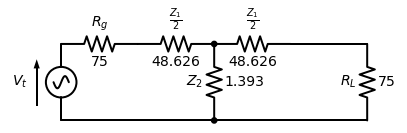

In [88]:
Z1, Z2 = sp.symbols("Z1 Z2")

alpha_db = 37.14
Zi1 = 50
Zi2 = 50
t_imagen = sp.Matrix(Timg(alpha_n(alpha_db), Zi1, Zi2))

display(Latex("Parametros T para "+ f"$\\alpha = {alpha_db}d_B$"))
display(Latex('$T_i=$'), sp.simplify(t_imagen))

t_z = sp.Matrix(np.dot(np.dot(TZ(Z1/2), TY(1/Z2)), TZ(Z1/2)))
t_z = sp.simplify(t_z)
display(Latex("Parametros T por impedancias:"))
display(Latex('$T_z=$'), t_z)

display(Latex("Igualando matrices:"))
display(sp.Eq(t_z, t_imagen))
display(sp.Eq(t_z - t_imagen, sp.Matrix([[0,0],[0,0]])))

Zs, = sp.nonlinsolve(t_z - t_imagen, Z1, Z2)
display(Latex("Resolviendo este sistema de ecuaciones:"))
display(Latex(f"$Z_1 = {Zs[0]}$"))
display(Latex(f"$Z_2 = {Zs[1]}$"))

t_z = (t_z.subs(Z1, Zs[0])).subs(Z2,Zs[1])
display(Latex("Reemplazando estos valores en $T_z:$"))
display(Latex('$T_z=$'), t_z)

#%%
# Construccion de esquematico

d = schem.Drawing(unit=2.5)
Zg = d.add(e.RES, d='right', label='$R_g$', botlabel='75') 
Z1_e = d.add(e.RES, d='right', label='$\\frac{Z_1}{2}$', botlabel=f'{round(float(Zs[0]/2),3)}')
d.add(e.DOT)
d.push()
Z2_e = d.add(e.RES, d='down', label='$Z_2$', botlabel=f'{round(float(Zs[1]),3)}')
d.pop()
Z1_e2 = d.add(e.RES, d='right', label='$\\frac{Z_1}{2}$', botlabel=f'{round(float(Zs[0]/2),3)}')
d.add(e.LINE, d='right', tox=Z2_e.end)
ZL = d.add(e.RES, d='down', label='$R_L$', botlabel='75')
d.add(e.LINE, d='left', tox=Z2_e.end)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=Zg.start)
Vt = d.add(e.SourceSin(), xy=Zg.start, toy=Z1_e2.end, lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.8, label='$V_t$')
d.draw()

**RED FINAL:**

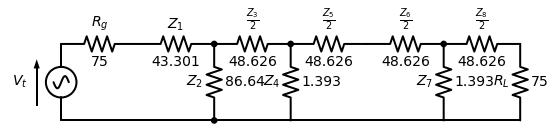

In [89]:
d = schem.Drawing(unit=2.5)

Zg = d.add(e.RES, d='right', label='$R_g$', botlabel='75') 
Za1 = d.add(e.RES, d='right', label='$Z_1$', botlabel=f'{round(float(Zsa[0]),3)}')
d.add(e.DOT)
d.push()
Za2 = d.add(e.RES, d='down', label='$Z_2$', botlabel=f'{round(float(Zsa[1]),3)}')
d.pop()

Z3_e = d.add(e.RES, d='right', label='$\\frac{Z_3}{2}$', botlabel=f'{round(float(Zs[0]/2),3)}')
d.add(e.DOT)
d.push()
Z4_e = d.add(e.RES, d='down', label='$Z_4$', botlabel=f'{round(float(Zs[1]),3)}')
d.pop()
Z5_e = d.add(e.RES, d='right', label='$\\frac{Z_5}{2}$', botlabel=f'{round(float(Zs[0]/2),3)}')
Z6_e = d.add(e.RES, d='right', label='$\\frac{Z_6}{2}$', botlabel=f'{round(float(Zs[0]/2),3)}')
d.add(e.DOT)
d.push()
Z7_e = d.add(e.RES, d='down', label='$Z_7$', botlabel=f'{round(float(Zs[1]),3)}')
d.pop()
Z8_e = d.add(e.RES, d='right', label='$\\frac{Z_8}{2}$', botlabel=f'{round(float(Zs[0]/2),3)}')

ZL = d.add(e.RES, d='down', label='$R_L$', botlabel='75')
d.add(e.LINE, d='left', tox=Z2_e.end)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=Zg.start)
Vt = d.add(e.SourceSin(), xy=Zg.start, toy=Z8_e.end, lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.8, label='$V_t$')
d.draw()

## Simulacion Circuital:
<img src="2-2.png">
<img src="2-2_osc.png">

In [90]:
# La medicion en LtSpice es afectada por el salto de impedancia por esto tenemos que tener encuenta el siguiente factor
medicion =-81.7153
salto = 10*np.log10(50/75)
print("Atenuacion real:", medicion - salto, "dB")

Atenuacion real: -79.95438740944319 dB
